# Statistical Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
################ Reading CSV ##################################

#Reading data csv 
Houston_data = "Resources/Houston Data/HOU_MergeCleanFINAL07282019.csv"
Houston_data = pd.read_csv(Houston_data,encoding="utf-8")

Chicago_data = "Resources/Chicago Data/CHI_MergeCleanFINAL07282019.csv"
Chicago_data = pd.read_csv(Chicago_data,encoding="utf-8")

Atlanta_data = "Resources/Atlanta Data/ATL_MergeCleanFINAL07282019.csv"
Atlanta_data = pd.read_csv(Atlanta_data,encoding="utf-8")

NY_data = "Resources/NY Data/NY_MergeCleanFINAL07282019.csv"
NY_data = pd.read_csv(NY_data,encoding="utf-8")

Seattle_data = "Resources/Seattle Data/SE_MergeCleanFINAL07282019.csv"
Seattle_data = pd.read_csv(Seattle_data,encoding="utf-8")

LA_data = "Resources/Los Angeles Data/LA_MergeCleanFINAL07282019.csv"
LA_data = pd.read_csv(LA_data,encoding="utf-8")


In [3]:
Houston_data_groupcity = Houston_data.groupby('City Name')
Houston_data_groupcity = Houston_data_groupcity['Min Price'].mean()
Houston_data_groupcity

Atlanta_data_groupcity = Atlanta_data.groupby('City Name')
Atlanta_data_groupcity = Atlanta_data_groupcity['Min Price'].mean()

NY_data_groupcity = NY_data.groupby('City Name')
NY_data_groupcity = NY_data_groupcity['Min Price'].mean()

LA_data_groupcity = LA_data.groupby('City Name')
LA_data_groupcity = LA_data_groupcity['Min Price'].mean()

Seattle_data_groupcity = Seattle_data.groupby('City Name')
Seattle_data_groupcity = Seattle_data_groupcity['Min Price'].mean()

Chicago_data_groupcity = Chicago_data.groupby('City Name')
Chicago_data_groupcity = Chicago_data_groupcity['Min Price'].mean()

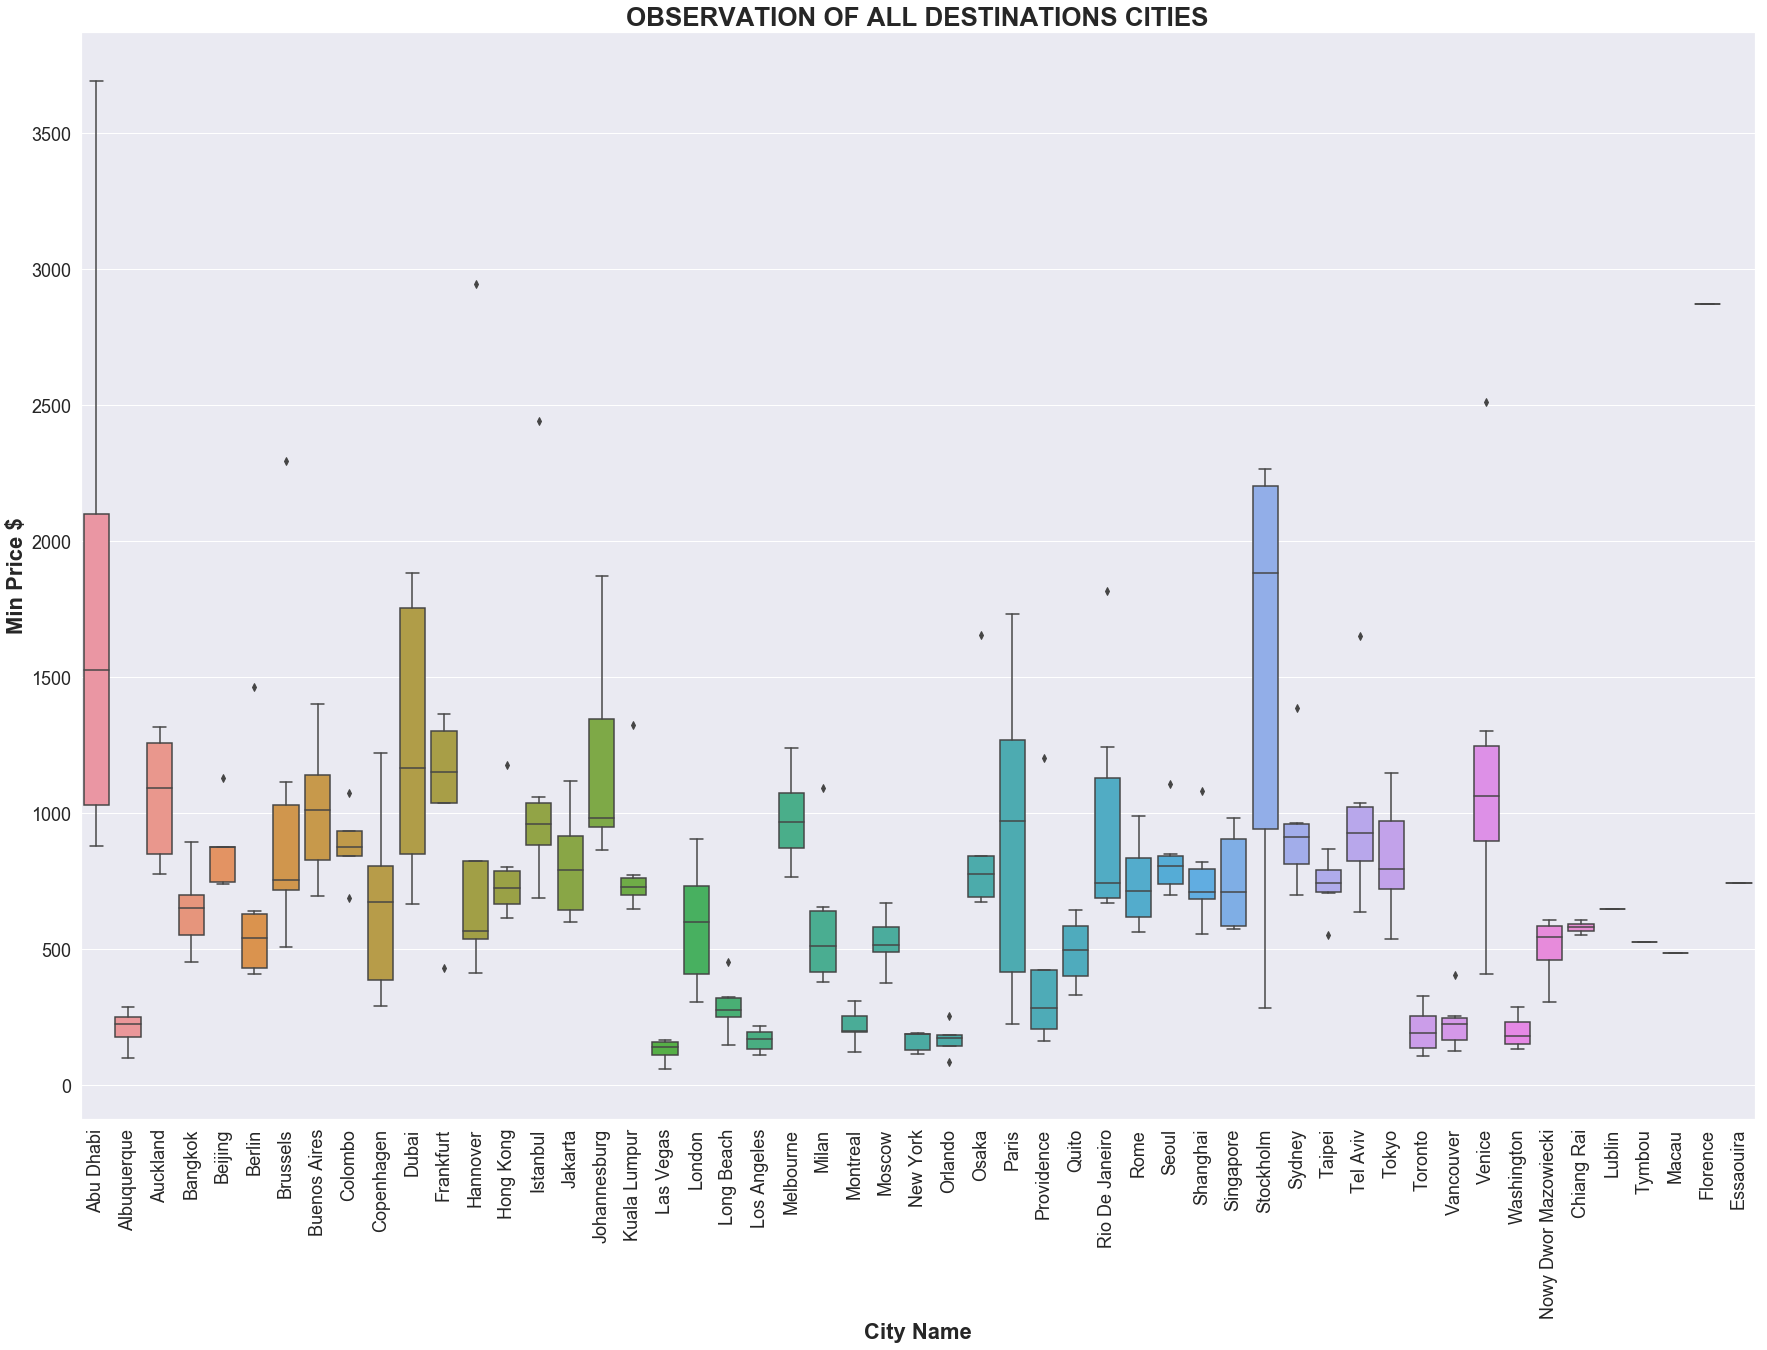

In [4]:
# Append all prices groupped by cities into one data frame
append1 = Houston_data_groupcity.append(Atlanta_data_groupcity)
append2 = append1.append(NY_data_groupcity)
append3 = append2.append(LA_data_groupcity)
append4 = append3.append(Seattle_data_groupcity)
city_and_price = append4.append(Chicago_data_groupcity)
city_and_price_df = pd.DataFrame(city_and_price)
city_and_price_df_reset = city_and_price_df.reset_index()
#city_and_price_df.boxplot("Min Price", by="City Name", figsize=(20, 10))

####################################### Box Plot Graph ##############################################
# Seaborn box plot size 
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(rc={'figure.figsize':(30,20)})
# Start with a basic boxplot
box_plot = sns.boxplot(x=city_and_price_df_reset["City Name"], y = city_and_price_df_reset['Min Price'], data = city_and_price_df_reset, dodge = True, width = 0.8,whis=1.5,fliersize=5 )
#Box plot x ticklabels rotation
plt.setp(box_plot.get_xticklabels(), rotation=90)

#Formatting the boxplot picture
box_plot.set_title("OBSERVATION OF ALL DESTINATIONS CITIES", loc="center", fontsize = 26, fontweight = 'bold')
box_plot.set_xlabel("City Name", fontsize = 22, fontweight = 'bold')
box_plot.set_ylabel("Min Price $", fontsize = 22, fontweight = 'bold')
# Tick Size https://stackoverflow.com/questions/36220829/fine-control-over-the-font-size-in-seaborn-plots-for-academic-papers
box_plot.tick_params(labelsize=18)

# Save Image
#plt.savefig("images/boxplotcitiesprices.png", bbox_inches="tight")

In [5]:
################################################## ANOVA TEST ############################################### 
#Perform ANOVA Test
# First Extract individual groups
g1 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Abu Dhabi']['Min Price']
g2 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Auckland']['Min Price']
g3 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Copenhagen']['Min Price']
g4 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Dubai']['Min Price']
g5 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Stockholm']['Min Price']
g6 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Venice']['Min Price']
g7 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Paris']['Min Price']
g8 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Buenos Aires']['Min Price']
g9 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Tokyo']['Min Price']
g10 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Rio De Janeiro']['Min Price']

#Perform the ANOVA
stats.f_oneway(g1, g2, g3, g4, g5, g6, g7, g8, g9, g10)

F_onewayResult(statistic=1.9541614193332029, pvalue=0.0652234332283013)

[None, None]

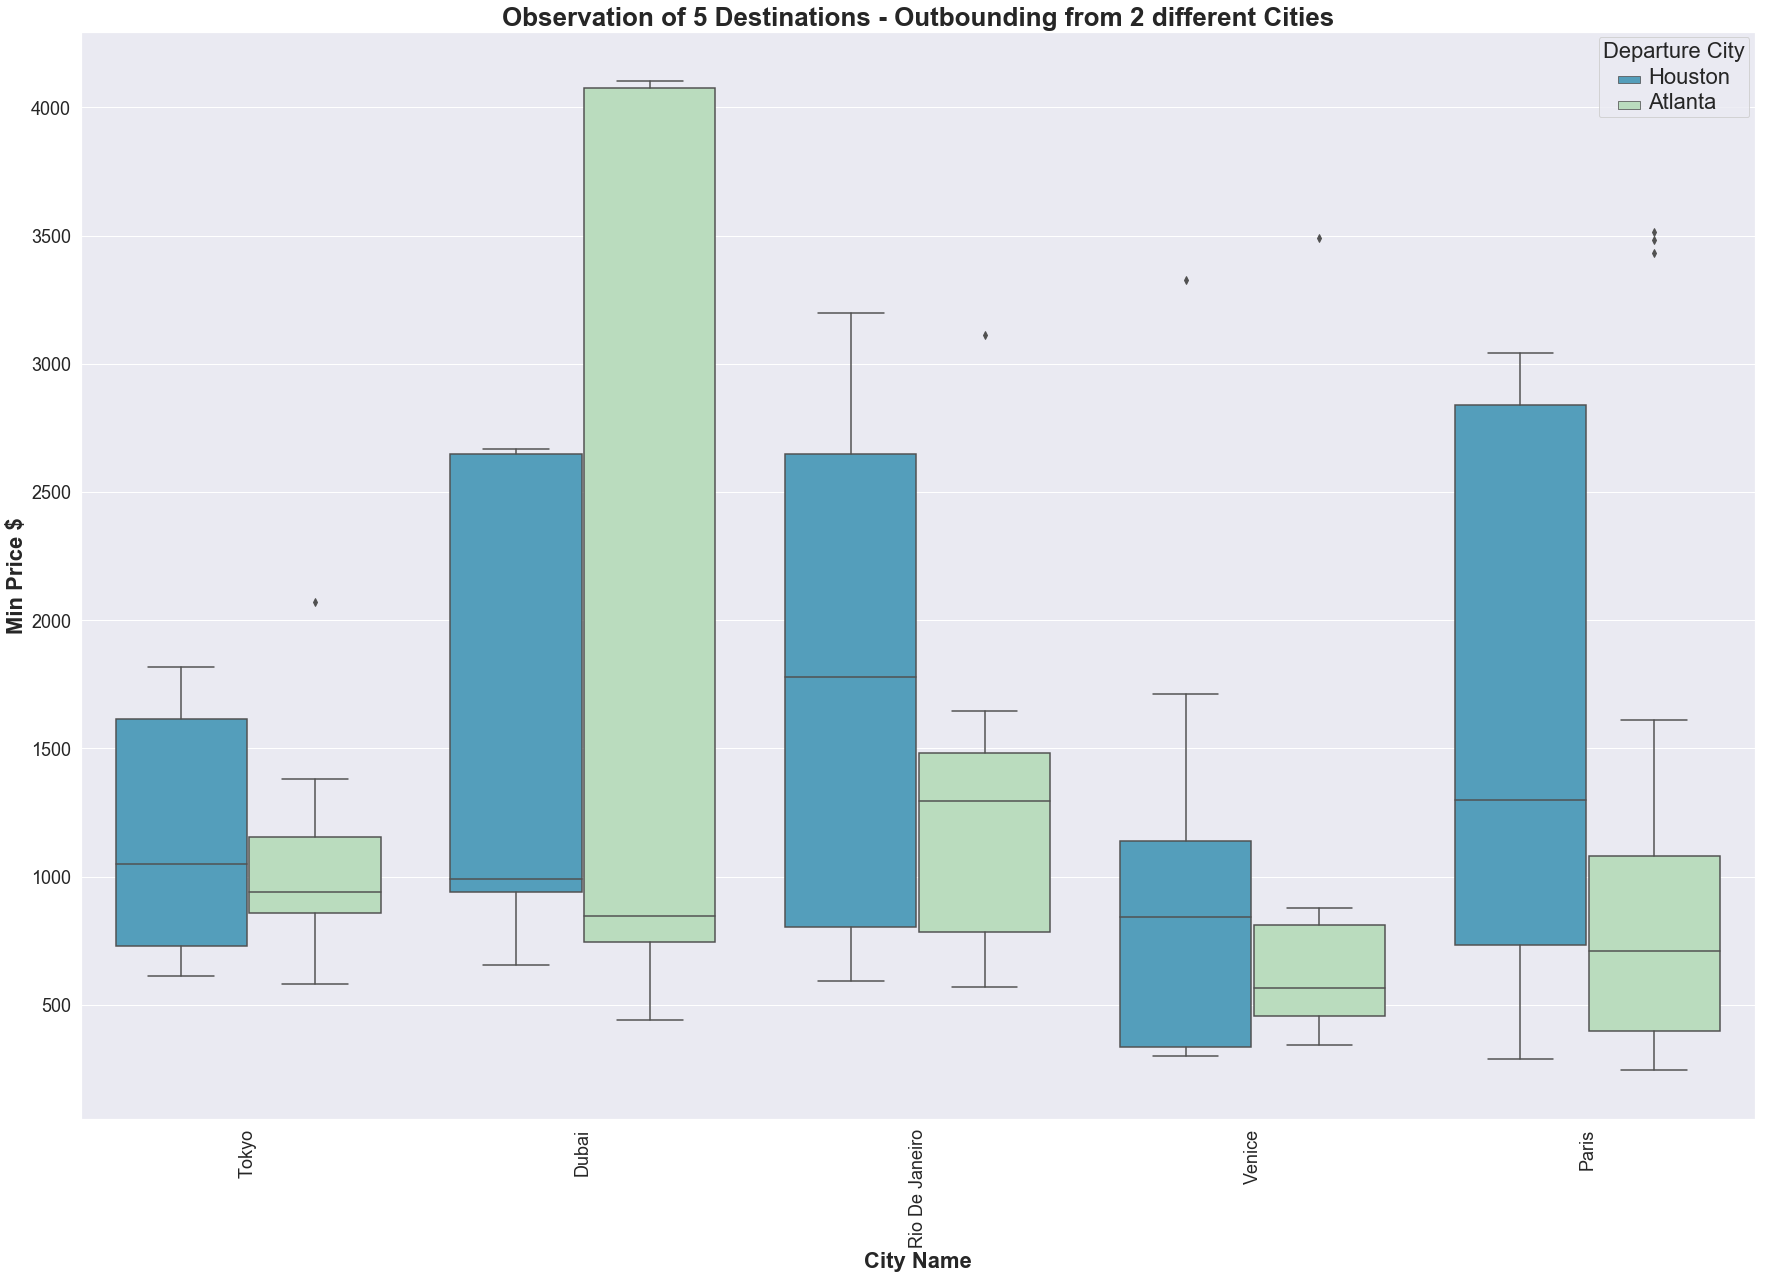

In [6]:
############################ Create one big combined table with all data #####################
append10 = Houston_data.append(Atlanta_data)
append20 = append10.append(NY_data)
append30 = append20.append(LA_data)
append40 = append30.append(Seattle_data)
combined_table = append40.append(Chicago_data)
#combined_table

####################### Append Two Departure Cities Data to compare ##############################

# Append first table
append2departure = Houston_data.append(Atlanta_data)

# Pull specific city tame from the append 2 cities table
g01 = append2departure[append2departure['City Name'] == 'Tokyo']
g02 = append2departure[append2departure['City Name'] == 'Dubai']
g03 = append2departure[append2departure['City Name'] == 'Rio De Janeiro']
g04 = append2departure[append2departure['City Name'] == 'Venice']
g05 = append2departure[append2departure['City Name'] == 'Paris']

# Append those specific cities together

appendHouATL01 = g01.append(g02)
appendHouATL02 = appendHouATL01.append(g03) 
appendHouATL03 = appendHouATL02.append(g04) 
appendHouATLcombined = appendHouATL03.append(g05) 

####################################### Box Plot Graph the 2 comparison ##############################################

# Seaborn box plot size 
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(rc={'figure.figsize':(30,20)})
# Start with a basic boxplot
box_plot2 = sns.boxplot(x=appendHouATLcombined["City Name"], y = appendHouATLcombined['Min Price'], data = appendHouATLcombined, hue = 'Departure City', dodge = True, width = 0.8,whis=1.5,fliersize=5, palette = "GnBu_r")
#Box plot x ticklabels rotation
plt.setp(box_plot2.get_xticklabels(), rotation=90)

#Formatting the boxplot picture
box_plot2.set_title("Observation of 5 Destinations - Outbounding from 2 different Cities", loc="center", fontsize = 26, fontweight = 'bold')
box_plot2.set_xlabel("City Name", fontsize = 22, fontweight = 'bold')
box_plot2.set_ylabel("Min Price $", fontsize = 22, fontweight = 'bold')
# Tick Size https://stackoverflow.com/questions/36220829/fine-control-over-the-font-size-in-seaborn-plots-for-academic-papers
box_plot2.tick_params(labelsize=18)

#Modify Legend Size
#https://stackoverflow.com/questions/44880444/how-to-increase-the-font-size-of-the-legend-in-my-seaborn-plot

plt.setp(box_plot2.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(box_plot2.get_legend().get_title(), fontsize='22') # for legend title
# Save Image
#plt.savefig("images/boxplot2cities.png", bbox_inches="tight")

In [7]:
################################################## ANOVA TEST ############################################### 

# First Extract individual groups
g01 = append2departure[append2departure['City Name'] == 'Tokyo']['Min Price']
g02 = append2departure[append2departure['City Name'] == 'Dubai']['Min Price']
g03 = append2departure[append2departure['City Name'] == 'Rio De Janeiro']['Min Price']
g04 = append2departure[append2departure['City Name'] == 'Venice']['Min Price']
g05 = append2departure[append2departure['City Name'] == 'Paris']['Min Price']

#Perform ANOVA Test
stats.f_oneway(g01, g02, g03, g04, g05)

F_onewayResult(statistic=3.708615771307178, pvalue=0.005870175293385188)

In [8]:
combined_table

,Departure City,City ID,City Name,Airport Name,Iata Code,Country Name,City ID Departure,Min Price,Airline ID,Non-Stop Flight,Departure Date,Quote ID,Airline Name
0,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,454,1276,False,12/1/2019,1,Japan Airlines
1,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,487,1467,False,12/4/2019,2,Spirit Airlines
2,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,684,1065,False,12/12/2019,3,Frontier Airlines
3,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,918,898,False,12/14/2019,4,EVA Air
4,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,1022,1276,False,12/20/2019,5,Japan Airlines
5,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,500,835,False,12/25/2019,6,Air Canada
6,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,674,898,False,12/26/2019,7,EVA Air
7,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,619,835,False,12/27/2019,8,Air Canada
8,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,487,929,False,12/31/2019,9,Air China
9,Houston,42795,Bangkok,Bangkok Suvarnabhumi,BKK,Thailand,58440,494,1713,False,12/1/2019,1,Singapore Airlines


In [9]:
#export_csv = combined_table.to_csv(r'C:\Users\pablo\Google Drive\Certifications\Rice Data Analytics\HomeWorks_Projects\COPY_Project_1\Resources\Combined Tables_OneFile\FlightsDataCLEAN.csv',index = False)


In [10]:
combined_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 1279
Data columns (total 13 columns):
Departure City       7486 non-null object
City ID              7486 non-null int64
City Name            7486 non-null object
Airport Name         7486 non-null object
Iata Code            7486 non-null object
Country Name         7486 non-null object
City ID Departure    7486 non-null int64
Min Price            7486 non-null int64
Airline ID           7486 non-null int64
Non-Stop Flight      7486 non-null bool
Departure Date       7486 non-null object
Quote ID             7486 non-null int64
Airline Name         7486 non-null object
dtypes: bool(1), int64(5), object(7)
memory usage: 767.6+ KB


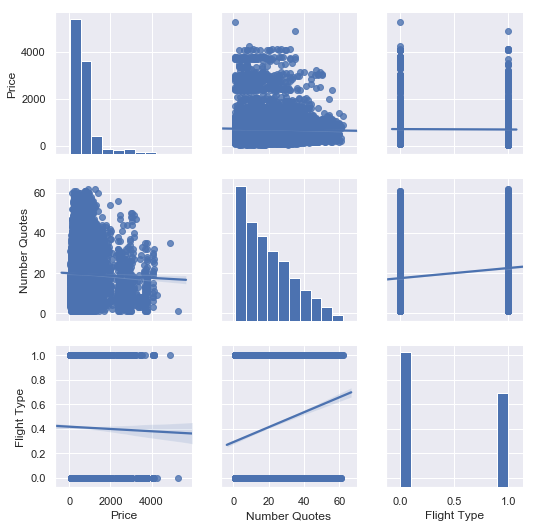

In [11]:
#Convert Bool to int
#https://www.geeksforgeeks.org/python-ways-to-convert-boolean-values-to-integer/
nonstopflight = combined_table['Non-Stop Flight']
nonstopflight = list(map(int,nonstopflight))

#Pull all numeric columns
minprice = combined_table['Min Price']
quotenumber = combined_table['Quote ID']

# Create a new data frame containing all numeric columns

flight_data_numeric = pd.DataFrame({'Price': minprice, 'Number Quotes': quotenumber, 'Flight Type': nonstopflight})
flight_data_numeric
sns.pairplot(flight_data_numeric, kind="reg")

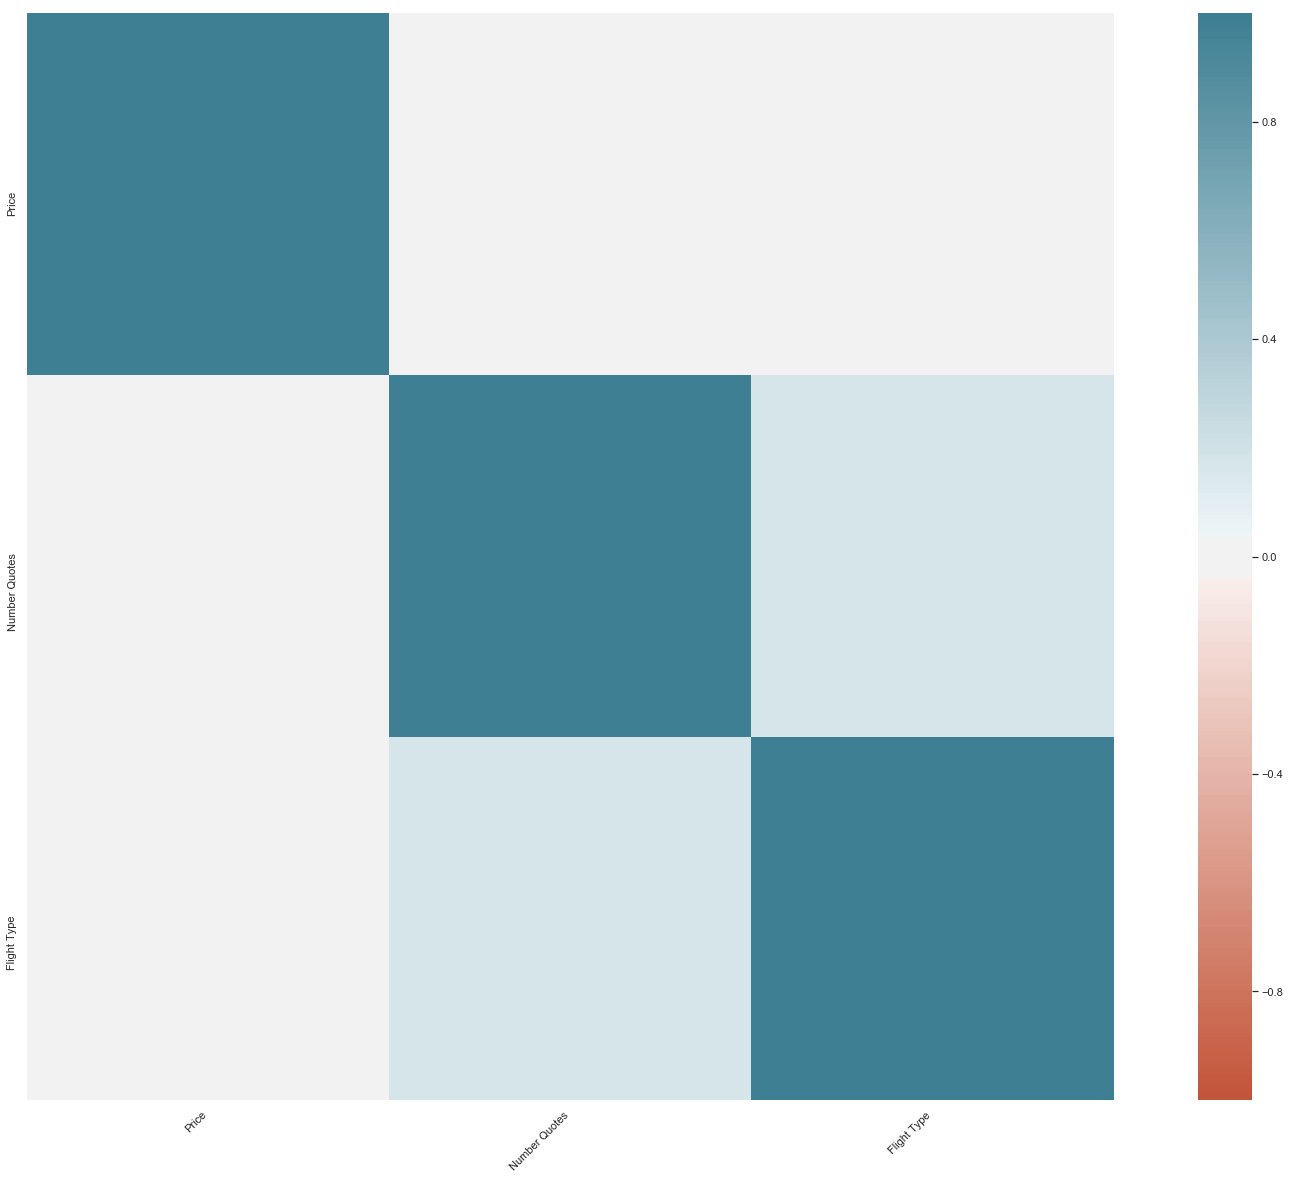

In [12]:
# heat map on correlation matrix
corr = flight_data_numeric.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


# T - Test (Independent Samples)
### Analyze whether two outbound cities have different average prices

In [48]:
append10 = Houston_data.append(Atlanta_data)
append20 = append10.append(NY_data)
append30 = append20.append(LA_data)
append40 = append30.append(Seattle_data)
combined_table = append40.append(Chicago_data)
combined_table.head()


#Calculate the population mean for prices in Houston
Houstonpop = Houston_data['Min Price']

#Calculate the population mean for prices in Chicago
Chicagopop = Chicago_data['Min Price']

#Calculate the population mean for prices in Chicago
ATLpop = Atlanta_data['Min Price']

#Calculate the population mean for prices in Chicago
NYpop = NY_data['Min Price']

#Calculate the population mean for prices in Chicago
LApop = LA_data['Min Price']

#Calculate the population mean for prices in Chicago
SEpop = Seattle_data['Min Price']



In [104]:
# Calculate Independent (Two Sample) T-Test
(t_stat, p_value) = stats.ttest_ind(NYpop, SEpop, equal_var=False)
(t_stat, p_value)

(-7.468148739753527, 1.3417714712811309e-13)

In [95]:
# Report the data
print("The mean price of Houston tickets price is {}.".format(Houstonpop.mean()))
print("The mean price of Chicago tickets price is {}.".format(Chicagopop.mean()))

print("p is {}.".format(p_value))

if p_value < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The mean price of Houston tickets price is 813.436974789916.
The mean price of Chicago tickets price is 733.39375.
p is 0.8677484042951555.
The difference in sample means is not significant.


In [81]:
# Plot sample means with error bars
tick_labels = ["Houston Price", "Chicago Price", "Los Angeles Price", 'New York Price', 'Atlanta Price', 'Seattle Price']

means = [Houstonpop.mean(), Chicagopop.mean(),LApop.mean(),NYpop.mean(),ATLpop.mean(),SEpop.mean()]
x_axis = np.arange(0, len(means))

sem = [Houstonpop.sem(), Chicagopop.sem(),LApop.sem(),NYpop.sem(),ATLpop.sem(),SEpop.sem()]

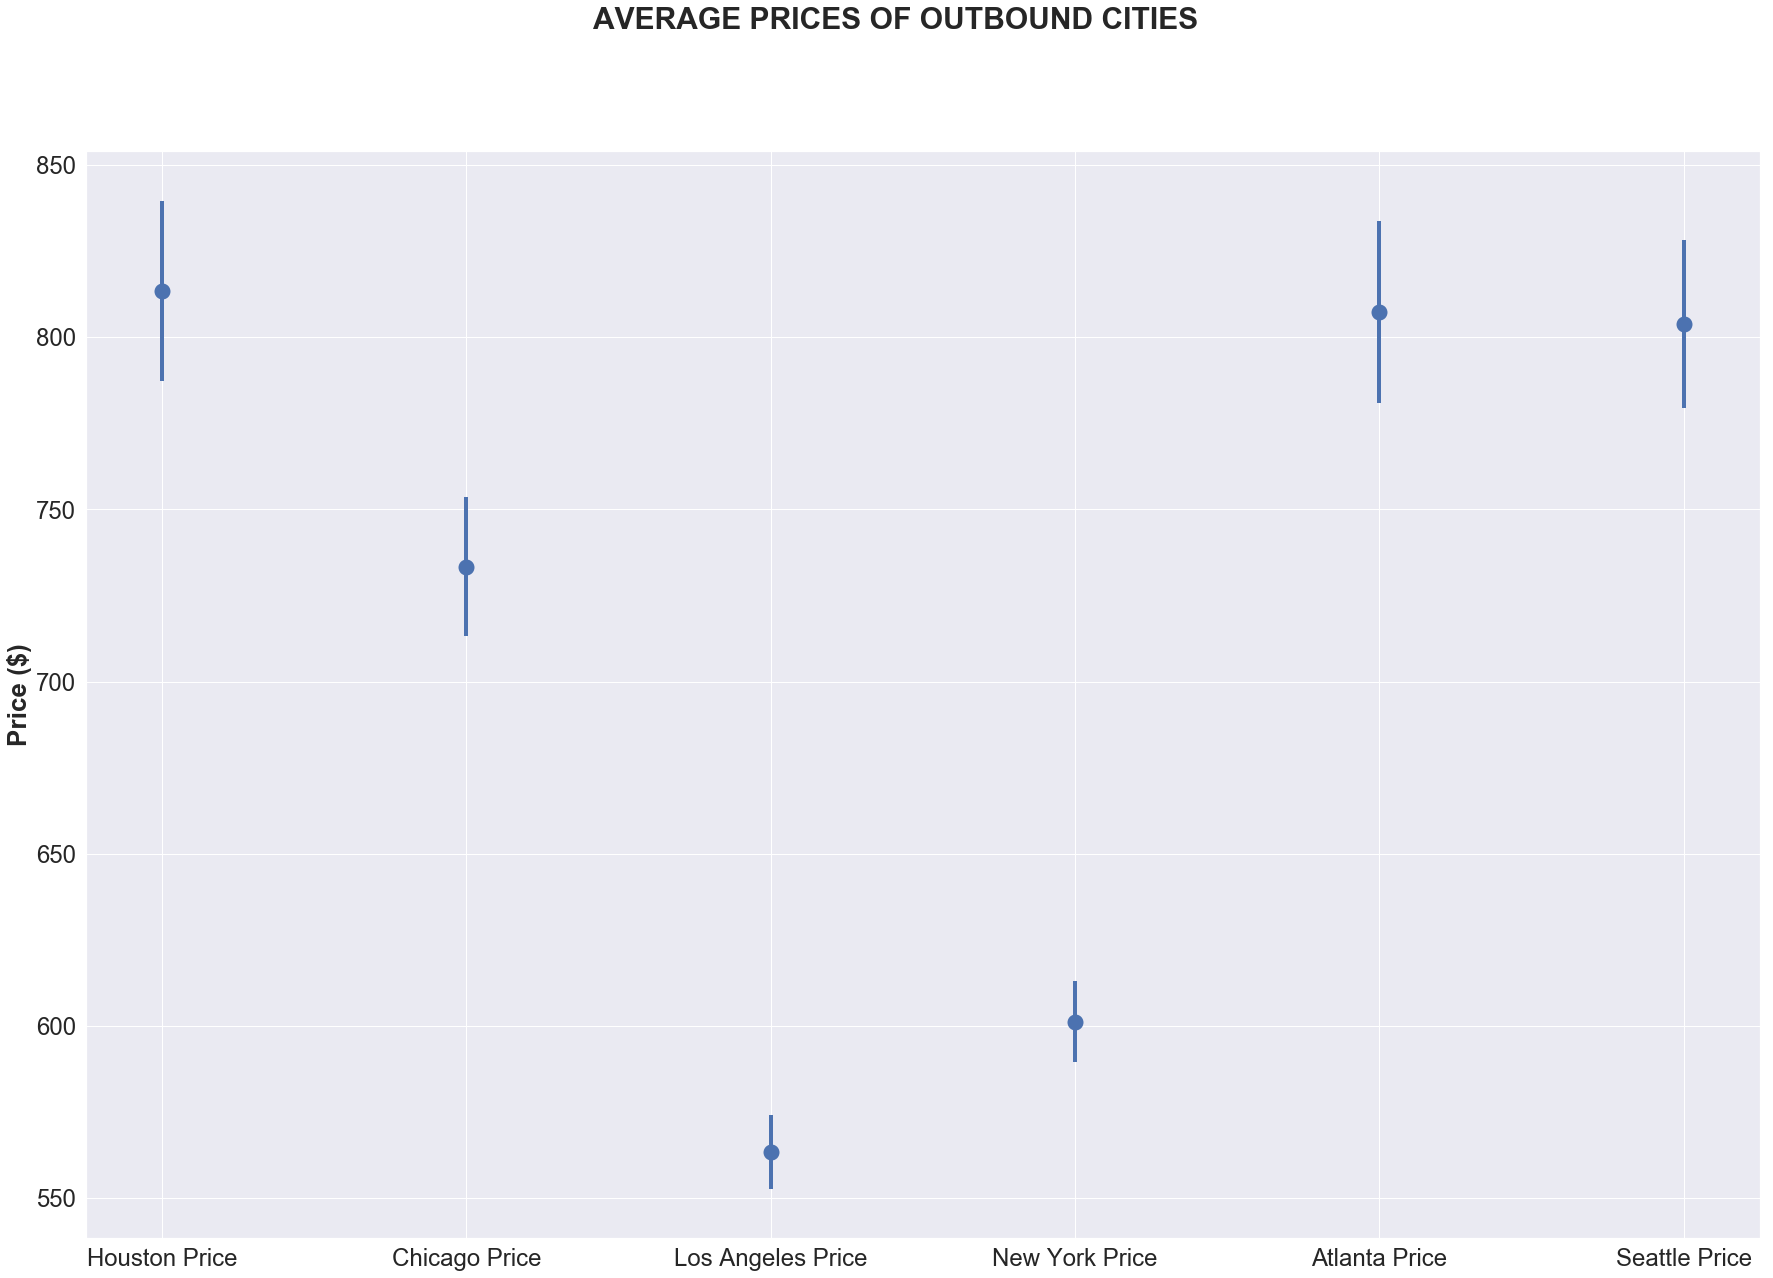

In [82]:
# Plot mean price of cities
fig, ax = plt.subplots()

fig.suptitle("AVERAGE PRICES OF OUTBOUND CITIES",fontsize=30, fontweight="bold")

ax.errorbar(x_axis, means, yerr=sem, fmt="o", elinewidth = 4, mew = 10)

#ax.set_xlim(-0.5, 1.5)
#ax.set_ylim(64, 73)

ax.set_xticklabels(tick_labels)
ax.set_xticks([0,1,2,3,4,5])

ax.set_ylabel("Price ($)",fontsize=26, fontweight="bold")
plt.xticks(fontsize=24)  
plt.yticks(fontsize=24)   

plt.savefig("images/averagepricesalloutboundcities.png", bbox_inches="tight")

plt.show()